In [93]:
# %pip install xlrd

In [94]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [97]:
class Draw_Graph():
    def __init__(self):
        mpl.rcParams['axes.unicode_minus'] = False
        plt.rc('font', family='Malgun Gothic')
        self.data = pd.read_excel("notExercise.xls")

    def make_data(self):
        tmp_list = []
        for item in self.data["대분류"].unique():
            if not item.endswith("구"):
                tmp_list.append(item)
        tmp_list.append("지역소분류")
        self.category = {i + 1: item for i, item in enumerate(tmp_list)}
        
    def choose_category(self, cate_num):
        try:
            if cate_num == 8:
                self.g_data = self.data[self.data["대분류"].str.endswith("구")]
                self.g_data = self.g_data.replace("-",0)
            else:
                self.g_data = self.data[self.data["대분류"] == self.category[cate_num]]
            self.g_data = self.g_data.iloc[:,2:]
            self.draw_pie()
        except:
            print("잘못 누르셨습니다. 올바른 번호를 선택해주세요.")

    def draw_pie(self):
        explode_tuple = (0.015,) * (len(self.g_data.index))
        plt.figure(figsize=(8,12))
        for i in range(1, len(self.g_data.columns)):
            plt.subplot(3,2,i)
            plt.pie(self.g_data.iloc[:,i],labels=self.g_data.loc[:,"분류"],autopct='%.1f%%',explode=explode_tuple)
            plt.title(self.g_data.columns[i])
        plt.suptitle(self.category[self.cate_num],fontsize=16)
        plt.tight_layout()
        plt.savefig(f'{self.category[self.cate_num]}.png', dpi = 200)
        plt.show()

    def draw_graph(self):
        self.make_data()
        for key, value in self.category.items():
            print(f'{key}. {value}')
        self.cate_num = int(input("번호를 선택하세요."))
        self.choose_category(self.cate_num)

1. 서울시
2. 성별
3. 연령별
4. 학력별
5. 소득별
6. 혼인상태별
7. 지역대분류
8. 지역소분류


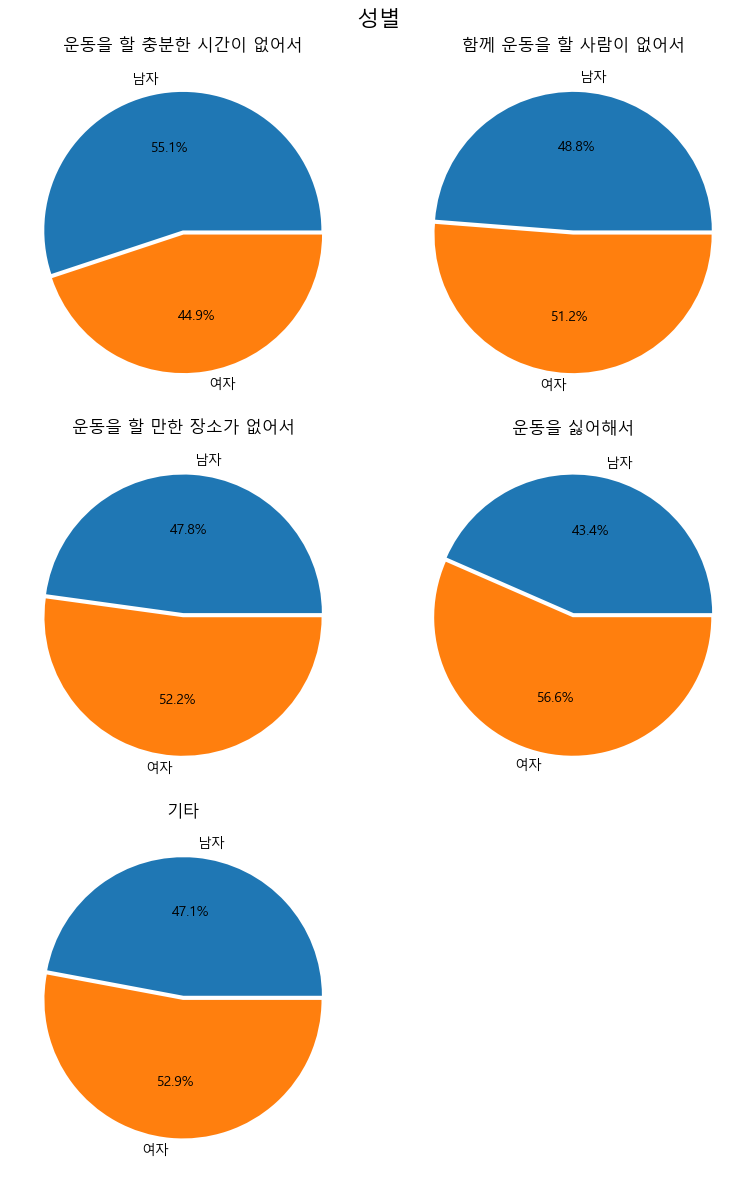

In [98]:
dg = Draw_Graph()
dg.draw_graph()